In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import scipy as sp
%matplotlib inline

In [2]:
!pip install version_information

  Running setup.py bdist_wheel for version-information: started
  Running setup.py bdist_wheel for version-information: finished with status 'done'
  Stored in directory: C:\Users\Nitesh\AppData\Local\pip\Cache\wheels\4b\4c\f7\4d99d7820a507d8ae55204fcc00d66cdabf596d4b01228e7bd
Successfully built version-information


You are using pip version 8.1.2, however version 9.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [4]:
!python -m pip install --upgrade pip

  Found existing installation: pip 8.1.2
    Uninstalling pip-8.1.2:
      Successfully uninstalled pip-8.1.2


In [2]:
%load_ext version_information
%version_information pandas, numpy, matplotlib, sklearn

Software versions
Python 2.7.12 64bit [MSC v.1500 64 bit (AMD64)]
IPython 5.1.0
OS Windows 10 10.0.14393
pandas 0.18.1
numpy 1.11.3
matplotlib 1.5.3
sklearn 0.18.1
Sun Feb 19 17:27:25 2017 Pacific Standard Time

In [3]:
#lets import train data
df=pd.read_csv("data/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.describe()

C:\Program Files\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [6]:
#train["Survived"].groupby(train["Survived"]).count()
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

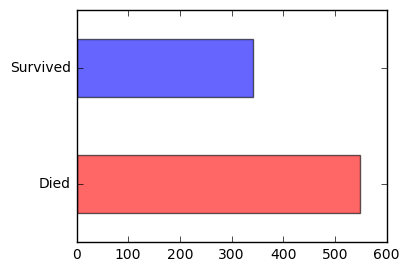

In [7]:
fig=plt.figure(figsize=(4,3))
ax=fig.add_subplot()
ax=df.Survived.value_counts().plot(kind='barh',color=['red','blue'],alpha=0.6)
ax.set_yticklabels(["Died","Survived"])

plt.show()

In [8]:
#let's explore Survived/Died based on features like Pclass,Sex, Age,Fare
male_surv=df.Survived[df.Survived==1][df.Sex=='male'].value_counts()
males=df.Survived[df.Sex=='male'].value_counts()
print(male_surv)

female_surv=df.Survived[df.Survived==1][df.Sex=='female'].value_counts()
females=df.Survived[df.Sex=='female'].value_counts()
print(female_surv)

1    109
Name: Survived, dtype: int64
1    233
Name: Survived, dtype: int64


3    47
1    45
2    17
Name: Pclass, dtype: int64
1    91
3    72
2    70
Name: Pclass, dtype: int64
3    300
2     91
1     77
Name: Pclass, dtype: int64
3    72
2     6
1     3
Name: Pclass, dtype: int64


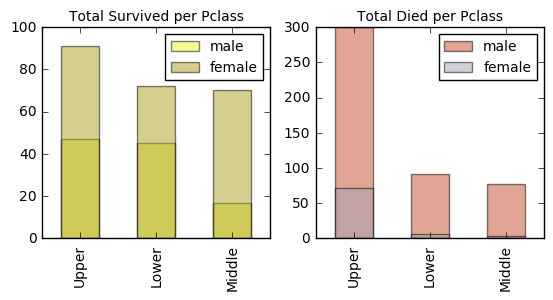

In [9]:
male_surv_pclass=df.Pclass[df.Survived==1][df.Sex=='male'].value_counts()
print(male_surv_pclass)

female_surv_pclass=df.Pclass[df.Survived==1][df.Sex=='female'].value_counts()
print(female_surv_pclass)

fig=plt.figure(figsize=(10,6))
#ax1=fig.add_subplot(345)
ax1=plt.subplot2grid((2,3),(0,0))
male_surv_pclass.plot(kind='bar',alpha=0.5,color='#eff123',label='male')
female_surv_pclass.plot(kind='bar',alpha=0.5,color='#aaa121',label='female')
ax1.set_xticklabels(['Upper','Lower','Middle'])
plt.legend(loc='best',prop={'size':10})
plt.title('Total Survived per Pclass',fontsize=10)


male_died_pclass=df.Pclass[df.Survived==0][df.Sex=='male'].value_counts()
print(male_died_pclass)

female_died_pclass=df.Pclass[df.Survived==0][df.Sex=='female'].value_counts()
print(female_died_pclass)


#ax=fig.add_subplot(346,sharey=ax1)
ax2=plt.subplot2grid((2,3),(0,1))
male_died_pclass.plot(kind='bar',alpha=0.5,color='#c44d2e',label='male')
female_died_pclass.plot(kind='bar',alpha=0.5,color='#a3a2b2',label='female')
ax2.set_xticklabels(['Upper','Lower','Middle'])
plt.legend(loc='best',prop={'size':10})
plt.title('Total Died per Pclass',fontsize=10)

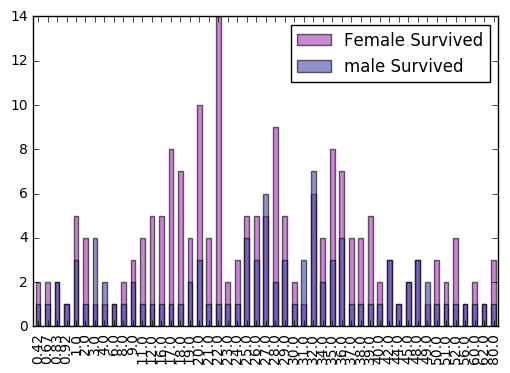

In [10]:
df.Age[df.Survived==1][df.Sex=='female'].value_counts().sort_index().plot.bar(color='#aa33bb',alpha=0.6,label='Female Survived')

df.Age[df.Survived==1][df.Sex=='male'].value_counts().sort_index().plot.bar(color='#454aab',alpha=0.6,label='male Survived')

plt.legend(loc='best')


In [11]:

#print(df.groupby('SibSp').SibSp.count())
#print(df.groupby('Parch').Parch.count())

print(df.SibSp.value_counts())
print(df.Parch.value_counts())

print(df.SibSp[df.Survived==1][df.SibSp!=0].count())
print(df.SibSp[df.Survived==1][df.Parch!=0].count())

print(df.SibSp[df.Survived==1][df.Sex=='male'][df.SibSp!=0].count())
print(df.Parch[df.Survived==1][df.Sex=='male'][df.Parch!=0].count())

print(df.SibSp[df.Survived==1][df.Sex=='female'][df.SibSp!=0].count())
print(df.Parch[df.Survived==1][df.Sex=='female'][df.Parch!=0].count())



0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64
132
109
36
29
96
80


In [12]:
df.Embarked.unique()
df.Embarked=df.Embarked.fillna('S')
print(df.groupby('Embarked').Embarked.count())

Embarked
C    168
Q     77
S    646
Name: Embarked, dtype: int64


In [13]:
print(df.Embarked[df.Survived==1][df.Embarked=='S'].value_counts())
print(df.Survived[df.Survived==1][df.Embarked=='C'].value_counts())
print(df.Survived[df.Survived==1][df.Embarked=='Q'].value_counts())

S    219
Name: Embarked, dtype: int64
1    93
Name: Survived, dtype: int64
1    30
Name: Survived, dtype: int64


## Lets Update the data

In [14]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       891
dtype: int64

In [16]:
#lets fill the age for the missing records with mean age
df.Age=df.Age.fillna(df.Age.mean())

In [27]:
#convert char var to categorical

# 0='male 1='female'
df.loc[df.Sex=="male","Sex"]=0
df.loc[df.Sex=="female","Sex"]=1

# 0='S' 1='C' 2='Q'
df.loc[df.Embarked=='S',"Embarked"]=0
df.loc[df.Embarked=='C',"Embarked"]=1
df.loc[df.Embarked=='Q',"Embarked"]=2


df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0


In [18]:
df.Cabin.isnull().value_counts()

True     687
False    204
Name: Cabin, dtype: int64

In [95]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import KFold

predictors=['Pclass','Sex','Age','Fare','Embarked']

model=LinearRegression()

kf=KFold(df.shape[0],n_folds=3,random_state=1)

predictions=[]

for train,test in kf:
    train_predictors=(df[predictors].iloc[train,:])
    train_target=df["Survived"].iloc[train]
    
    model.fit(train_predictors,train_target)
    test_predictions=model.predict(df[predictors].iloc[test,:])
    predictions.append(test_predictions)
    print(predictions)


[array([ 0.09677156,  0.96650753,  0.54254796,  0.92820685,  0.03297939,
        0.16371057,  0.36949308,  0.19547893,  0.53775907,  0.86871179,
        0.65088443,  0.81429327,  0.10662042,  0.01421422,  0.60145812,
        0.6145519 ,  0.30047301,  0.27326276,  0.51837941,  0.57670705,
        0.24772694,  0.252148  ,  0.70124698,  0.49652288,  0.63141116,
        0.48451649,  0.1113184 ,  0.54925343,  0.62907747,  0.05899776,
        0.48966368,  1.01008616,  0.62907261,  0.09495323,  0.55062189,
        0.42841107,  0.11131856,  0.10171101,  0.58220163,  0.65393121,
        0.47387455,  0.75220298,  0.1113436 ,  0.92314751,  0.68160374,
        0.05900355,  0.16397509,  0.62907261,  0.11186137,  0.58219412,
        0.17163109,  0.10170162,  0.91270868,  0.742572  ,  0.36821553,
        0.48818123,  0.78126496,  0.11720551,  0.86046338,  0.15226442,
        0.14911662,  0.91448913,  0.4148652 ,  0.1859165 ,  0.54023485,
        0.1116197 ,  0.74198975,  0.11153389,  0.58673257,  0.0

In [96]:
predictions=np.concatenate(predictions,axis=0)
predictions[predictions <= .5]=0
predictions[predictions > .5]=1
accuracy=sum(predictions[predictions==df["Survived"]])/len(predictions)
predictions.tofile("result",sep=',')
print accuracy
print predictions

0.7822671156
[ 0.  1.  1.  1.  0.  0.  0.  0.  1.  1.  1.  1.  0.  0.  1.  1.  0.  0.
  1.  1.  0.  0.  1.  0.  1.  0.  0.  1.  1.  0.  0.  1.  1.  0.  1.  0.
  0.  0.  1.  1.  0.  1.  0.  1.  1.  0.  0.  1.  0.  1.  0.  0.  1.  1.
  0.  0.  1.  0.  1.  0.  0.  1.  0.  0.  1.  0.  1.  0.  1.  0.  0.  1.
  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  1.  0.  1.  1.  0.  0.  1.  0.
  0.  0.  0.  0.  0.  0.  0.  1.  1.  0.  1.  0.  1.  0.  0.  0.  1.  0.
  0.  1.  0.  1.  0.  1.  1.  0.  0.  0.  1.  1.  0.  0.  0.  1.  0.  0.
  0.  0.  1.  0.  0.  0.  0.  1.  0.  0.  1.  0.  0.  1.  1.  1.  1.  0.
  0.  0.  0.  1.  0.  0.  0.  1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.
  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.  0.  0.
  1.  0.  0.  0.  1.  0.  1.  0.  0.  0.  1.  0.  1.  0.  1.  1.  0.  0.
  1.  1.  0.  0.  0.  0.  0.  1.  0.  0.  1.  0.  0.  1.  0.  0.  0.  1.
  1.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  0.  0.  1.
  0.  1.  0.  1.  0.  0.  1.  1.  0.  

C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index


In [97]:
#Logistic Regression
from sklearn import cross_validation as cv
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(random_state=1)
scores=cv.cross_val_score(model,df[predictors],df["Survived"],cv=3)
#scores=cv.cross_val_score(model,df_test[predictors],submit["Survived"],cv=3)
print scores.mean()

0.791245791246


In [84]:
df_test=pd.read_csv('data/test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [85]:
df_test.count()

PassengerId    418
Pclass         418
Name           418
Sex            418
Age            332
SibSp          418
Parch          418
Ticket         418
Fare           417
Cabin           91
Embarked       418
dtype: int64

In [86]:
#updating the test data
df_test.Age=df_test.Age.fillna(df.Age.mean())

df_test.loc[df_test.Sex=='male','Sex']=0
df_test.loc[df_test.Sex=='female','Sex']=1

df_test.Embarked=df_test.Embarked.fillna('S')
df_test.loc[df_test.Embarked=='S','Embarked']=0
df_test.loc[df_test.Embarked=='C','Embarked']=1
df_test.loc[df_test.Embarked=='Q','Embarked']=2
df_test.Fare=df_test.Fare.fillna(df_test.Fare.mean())

df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,0
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,2
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,0


In [87]:
df_test.Fare[ df_test.Fare < 20][df_test.Fare > 10].count()

82

In [89]:
model=LogisticRegression(random_state=1)
model.fit(df[predictors],df["Survived"])

predictions=model.predict(df_test[predictors])

submit=pd.DataFrame({'PassengerId':df_test["PassengerId"],'Survived':predictions})
submit.to_csv('data/output/output.csv',index=False)
submit
predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0,

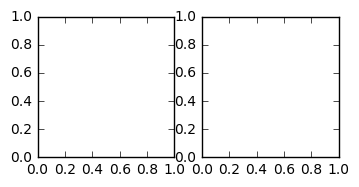

In [223]:
fig = plt.figure()
  
ax1 = plt.subplot2grid((2, 3), (0, 0))
ax2 = plt.subplot2grid((2, 3), (0, 1))
#ax3 = plt.subplot2grid((3, 3), (1, 0), colspan=2, rowspan=2)
#ax4 = plt.subplot2grid((3, 3), (1, 2), rowspan=2)

reference :
https://github.com/agconti/kaggle-titanic/blob/master/Titanic.ipynb


https://www.dataquest.io/